# 네이버 영화 리뷰 데이터


    네이버 영화 리뷰 데이터 셋인 https://github.com/e9t/nsmc 에서 다운로드함.
    ratings.txt 대신 raw data 읽어와서 csv 파일로 저장.
        
    추후 감성 분석 데이터로 사용.

In [15]:
import os
import json
import pandas as pd
from tqdm import tqdm

root = 'raw/{}'
files = os.listdir('raw')

df = pd.DataFrame()

for file in tqdm(files) : 
    path = root.format(file)
    tojson = open(path).read()
    
    info = json.loads(tojson)

    df = df.append(pd.json_normalize(info))
    
df.info()

100%|██████████| 14730/14730 [09:01<00:00, 27.19it/s]


<class 'pandas.core.frame.DataFrame'>
Int64Index: 712404 entries, 0 to 88
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   review_id  712404 non-null  object
 1   movie_id   712404 non-null  object
 2   author     712404 non-null  object
 3   review     712404 non-null  object
 4   rating     712404 non-null  object
 5   date       712404 non-null  object
dtypes: object(6)
memory usage: 38.0+ MB


In [22]:
# review_id , movie_id , author, date column 삭제

drop_col = ['review_id','movie_id','author','date']

df.drop(drop_col,axis=1,inplace=True)
df.head()

,review,rating
0,종합 평점은 4점 드립니다.,4
1,원작이 칭송받는 이유는 웹툰 계 자체의 질적 저하가 심각하기 때문. 원작이나 영화...,1
2,나름의 감동도 있고 안타까운 마음에 가슴도 먹먹 배우들의 연기가 good 김수현...,10
3,이런걸 돈주고 본 내자신이 후회스럽다 최악의 쓰레기 영화 김수현 밖에없는 저질 삼류영화,1
4,"초반엔 코미디, 후반엔 액션, 결론은 코미디.",7


<AxesSubplot:>

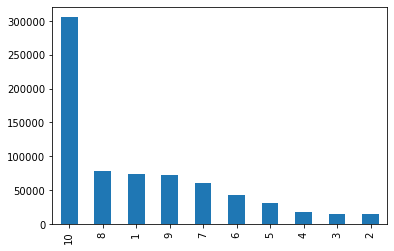

In [30]:
# rating 비율
df['rating'].value_counts().plot(kind='bar')

# 긍정 데이터가 많다. -> 1-4 : 부정(0) / 5-7 : 중립(1) / 8-10 : 긍정(2) 으로 레이블링

In [41]:
# rating 타입이 string임
mapping = {'1':0,'2':0,'3':0,'4':0,'5':1,'6':1,'7':1,'8':2,'9':2,'10':2}
df['label'] = df['rating'].map(mapping)
df.head()

,review,rating,label
0,종합 평점은 4점 드립니다.,4,0
1,원작이 칭송받는 이유는 웹툰 계 자체의 질적 저하가 심각하기 때문. 원작이나 영화...,1,0
2,나름의 감동도 있고 안타까운 마음에 가슴도 먹먹 배우들의 연기가 good 김수현...,10,2
3,이런걸 돈주고 본 내자신이 후회스럽다 최악의 쓰레기 영화 김수현 밖에없는 저질 삼류영화,1,0
4,"초반엔 코미디, 후반엔 액션, 결론은 코미디.",7,1


In [47]:
# rating 제거 후 csv파일로 저장.

df.drop(['rating'],axis=1,inplace=True)
df.to_csv('naver_movie_reviews.csv',index=False)